### Name : Shobhit Mirjankar
### Batch : C32
### Roll No : 1902101

In [138]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
np.set_printoptions(suppress=True)
from scipy import stats
pd.options.display.float_format = '{:.3f}'.format
np.set_printoptions(threshold=3)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb

In [139]:
dataset = pd.read_csv('cars.csv')
dataset

,year_bought,km_driven,transmission,owner,selling_price
0,2007,70000,Manual,First Owner,60000
1,2007,50000,Manual,First Owner,135000
2,2012,100000,Manual,First Owner,600000
3,2017,46000,Manual,First Owner,250000
4,2014,141000,Manual,Second Owner,450000
...,...,...,...,...,...
4335,2014,80000,Manual,Second Owner,409999
4336,2014,80000,Manual,Second Owner,409999
4337,2009,83000,Manual,Second Owner,110000
4338,2016,90000,Manual,First Owner,865000


In [140]:
# Data Analysis
print(dataset['transmission'].unique())
print(dataset['owner'].unique())

['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [141]:
# Data Preprocessing

le = LabelEncoder()
dataset['transmission'] = le.fit_transform(dataset['transmission'])
oe = OrdinalEncoder(categories=[['Test Drive Car','First Owner','Second Owner',
                                 'Third Owner','Fourth & Above Owner']],dtype=int)
dataset[['owner']] = oe.fit_transform(dataset[['owner']])
dataset

,year_bought,km_driven,transmission,owner,selling_price
0,2007,70000,1,1,60000
1,2007,50000,1,1,135000
2,2012,100000,1,1,600000
3,2017,46000,1,1,250000
4,2014,141000,1,2,450000
...,...,...,...,...,...
4335,2014,80000,1,2,409999
4336,2014,80000,1,2,409999
4337,2009,83000,1,2,110000
4338,2016,90000,1,1,865000


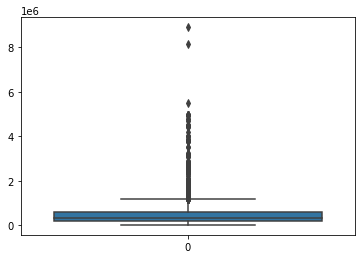

Outlier Indexes : [  89   96  101 ... 4224 4304 4313]


In [142]:
# Outlier Removal
sns.boxplot(data = dataset['selling_price'])
plt.show()
z = np.abs(stats.zscore(dataset['selling_price']))
outliers = np.where(z>3)[0]
print('Outlier Indexes :',outliers)
dataset.drop(outliers,inplace = True)

In [143]:
X = dataset[['year_bought','km_driven','transmission','owner']]
y = dataset['selling_price']
X

,year_bought,km_driven,transmission,owner
0,2007,70000,1,1
1,2007,50000,1,1
2,2012,100000,1,1
3,2017,46000,1,1
4,2014,141000,1,2
...,...,...,...,...
4335,2014,80000,1,2
4336,2014,80000,1,2
4337,2009,83000,1,2
4338,2016,90000,1,1


In [144]:
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4248, dtype: int64

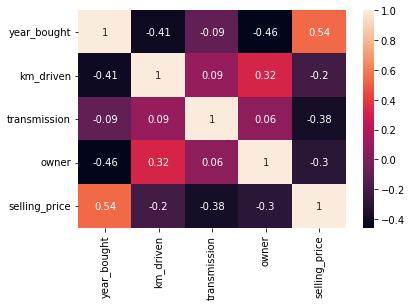

In [145]:
# Feature Importance
correl_matrix = dataset.corr().round(2)
sns.heatmap(data=correl_matrix, annot=True)
plt.show()

Hence 'year_bought' is most important feature to predict 'selling_price'

In [146]:
# Split dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=13)
X_train

,year_bought,km_driven,transmission,owner
1863,2018,40000,1,1
2172,2016,40000,1,1
2553,2016,138925,1,1
965,2014,120000,1,1
2244,2015,11918,1,1
...,...,...,...,...
158,2020,120000,1,1
890,2018,10500,1,1
2863,2018,30000,1,1
74,2009,120000,1,3


In [147]:
# Normalization

scaler = MinMaxScaler()
X_train[['year_bought','km_driven']] = scaler.fit_transform(
    X_train[['year_bought','km_driven']])
X_test[['year_bought','km_driven']] = scaler.transform(
    X_test[['year_bought','km_driven']])
X_train

,year_bought,km_driven,transmission,owner
1863,0.920,0.050,1,1
2172,0.840,0.050,1,1
2553,0.840,0.172,1,1
965,0.760,0.149,1,1
2244,0.800,0.015,1,1
...,...,...,...,...
158,1.000,0.149,1,1
890,0.920,0.013,1,1
2863,0.920,0.037,1,1
74,0.560,0.149,1,3


# Stacking

In [148]:
# Choosing the base models : Decision Tree, Support Vector Regressor, KNN Regressor
estimators = [('dt', DecisionTreeRegressor(random_state=13)),('svr', SVR()),
             ('knr',KNeighborsRegressor(n_neighbors = 40))]

In [149]:
# Choosing the meta model : Linear Regression
stacker = StackingRegressor(estimators=estimators,final_estimator=LinearRegression())
stacker.fit(X_train,y_train)

StackingRegressor(estimators=[('dt', DecisionTreeRegressor(random_state=13)),
                              ('svr', SVR()),
                              ('knr', KNeighborsRegressor(n_neighbors=40))],
                  final_estimator=LinearRegression())

In [150]:
# Evaluating performance of model

y_train_pred = stacker.predict(X_train)
y_test_pred = stacker.predict(X_test)

print('Training set performance :')
print('R2 Score : ',round(r2_score(y_train,y_train_pred),3))
print('RMSE : ',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print()
print()
print('Test set performance :')
print('R2 Score : ',round(r2_score(y_test,y_test_pred),3))
print('RMSE : ',np.sqrt(mean_squared_error(y_test,y_test_pred)))
pred_stack = y_test_pred

Training set performance :
R2 Score :  0.65
RMSE :  194436.95481424822


Test set performance :
R2 Score :  0.451
RMSE :  251726.81985057672


# Bagging 

In [125]:
# Using Random Forest for Bagging which contain homogeneous models : Decision Trees

bagger = RandomForestRegressor(random_state=13,n_estimators=200)
bagger.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200, random_state=13)

In [151]:
# Evaluating performance of model

y_train_pred = bagger.predict(X_train)
y_test_pred = bagger.predict(X_test)

print('Training set performance :')
print('R2 Score : ',round(r2_score(y_train,y_train_pred),3))
print('RMSE : ',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print()
print()
print('Test set performance :')
print('R2 Score : ',round(r2_score(y_test,y_test_pred),3))
print('RMSE : ',np.sqrt(mean_squared_error(y_test,y_test_pred)))
pred_rf = y_test_pred

Training set performance :
R2 Score :  0.778
RMSE :  154930.07982554229


Test set performance :
R2 Score :  0.363
RMSE :  271146.0655493607


# Boosting - AdaBoost

In [152]:
# Using AdaBoost with Decision Trees as base estimator

ada_booster = AdaBoostRegressor(random_state=13,n_estimators=100)
ada_booster.fit(X_train,y_train)

AdaBoostRegressor(n_estimators=100, random_state=13)

In [153]:
# Evaluating performance of model

y_train_pred = ada_booster.predict(X_train)
y_test_pred = ada_booster.predict(X_test)

print('Training set performance :')
print('R2 Score : ',round(r2_score(y_train,y_train_pred),3))
print('RMSE : ',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print()
print()
print('Test set performance :')
print('R2 Score : ',round(r2_score(y_test,y_test_pred),3))
print('RMSE : ',np.sqrt(mean_squared_error(y_test,y_test_pred)))
pred_ada = y_test_pred

Training set performance :
R2 Score :  0.434
RMSE :  247483.17435028765


Test set performance :
R2 Score :  0.395
RMSE :  264230.2568571042


# Boosting - XGBoost

In [154]:
xg_booster = xgb.XGBRegressor(objective ='reg:squarederror',
                              learning_rate = 0.1,n_estimators = 250)
xg_booster.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=250, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [155]:
# Evaluating performance of model

y_train_pred = xg_booster.predict(X_train)
y_test_pred = xg_booster.predict(X_test)

print('Training set performance :')
print('R2 Score : ',round(r2_score(y_train,y_train_pred),3))
print('RMSE : ',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print()
print()
print('Test set performance :')
print('R2 Score : ',round(r2_score(y_test,y_test_pred),3))
print('RMSE : ',np.sqrt(mean_squared_error(y_test,y_test_pred)))
pred_xg = y_test_pred

Training set performance :
R2 Score :  0.74
RMSE :  167664.88955831496


Test set performance :
R2 Score :  0.41
RMSE :  260973.64632438868


# Comparison of Results

In [156]:
result = pd.DataFrame({'Stacking':[0.65,0.451],'Bagging (RF)':[0.778,0.363],
                       'Boosting (AdaBoost)':[0.434,0.395],
                      'Boosting (XGBoost)':[0.74,0.41]},
                      index=['R2 (Train)','R2 (Test)'])
result

,Stacking,Bagging (RF),Boosting (AdaBoost),Boosting (XGBoost)
R2 (Train),0.650,0.778,0.434,0.740
R2 (Test),0.451,0.363,0.395,0.410


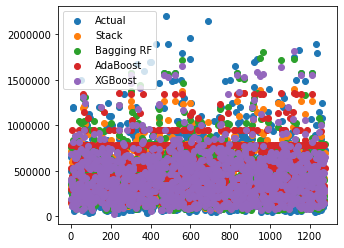

In [157]:
# Actual vs Predicted

plt.figure(figsize=(5, 4))
ax = plt.axes()
ax.scatter(range(len(y_test)),y_test)
ax.scatter(range(len(y_test)),pred_stack)
ax.scatter(range(len(y_test)),pred_rf)
ax.scatter(range(len(y_test)),pred_ada)
ax.scatter(range(len(y_test)),pred_xg)
ax.ticklabel_format(style='plain')
plt.legend(['Actual','Stack','Bagging RF','AdaBoost','XGBoost'])
plt.show()

Hence XGBoost performed better than other models and AdaBoost performed the worst